In [ ]:
# trabalho 7
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')

mainVideo = cv2.VideoCapture('/content/drive/MyDrive/Trabalho7/video.mp4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def enhance(image):
  color = ('b', 'g', 'r')
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):

      b, g, r = image[i, j]

      if b > 66 and g > 80 and r > 60:
        image[i, j] = (50, 50, 50)
      elif(
          r > 40 and r < 90
          and
          g > 60 and g < 100
          and
          b > 50 and b < 100
      ):
        image[i, j] = (255, 255, 255)
      else:
        image[i, j] = (50, 50, 50)

  return image

def gray(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def lim(image):
  _, limi = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
  return limi

def contours(limiarizada, image):
  contor, hierarquia = cv2.findContours(limiarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  imagem_contornos = image.copy()

  cv2.drawContours(imagem_contornos, contor, -1, (0, 255, 0), 2)

  return imagem_contornos, contor


In [ ]:
def getAreas(contors, counter):
  for contour in contors:
    (x, y, w, h) = cv2.boundingRect(contour)

    area = int(w) * int(h)
    razao = int(w) / int(h)

    if(area > 3000 and razao > 1):
      storage.append([x, y, w, h, area, razao, counter])

  # print(storage)

  if(counter == 0):
    print(f"Áreas detectadas: \n")

  print(f"[FRAME: {counter}]\n\n")

  return storage

def sumAreas(armaz):

  sum2017 = 0
  sum2018 = 0
  sum2019 = 0
  sum2020 = 0

  for element in armaz:
    if(element[6] >= 0 and element[6] <= 220):
      sum2017 = sum2017 + element[4]
    elif(element[6] >= 230 and element[6] <= 470):
      sum2018 = sum2018 + element[4]
    elif(element[6] >= 480 and element[6] <= 790):
      sum2019 = sum2019 + element[4]
    elif(element[6] >= 800 and element[6] <= 1050):
      sum2020 = sum2020 + element[4]
    else:
      pass

  anos = ["2017", "2018", "2019", "2020"]
  areas = [sum2017, sum2018, sum2019, sum2020]
  plt.grid()
  plt.title("Mapeamento do Desmatamento de 2017 a 2020")
  plt.xlabel("Anos")
  plt.ylabel("Área em 10^6")
  plt.scatter(anos, areas)
  plt.show()

Entre com uma das opções a seguir:
  1 - Código normal(otimizado)
  2 - Minha versão(consideravelmente mais devagar)
 Sua opção: 1
Áreas detectadas: 

[FRAME: 0]


[FRAME: 10]


[FRAME: 20]


[FRAME: 30]


[FRAME: 40]


[FRAME: 50]


[FRAME: 60]


[FRAME: 70]


[FRAME: 80]


[FRAME: 90]


[FRAME: 100]


[FRAME: 110]


[FRAME: 120]


[FRAME: 130]


[FRAME: 140]


[FRAME: 150]


[FRAME: 160]


[FRAME: 170]


[FRAME: 180]


[FRAME: 190]


[FRAME: 200]


[FRAME: 210]


[FRAME: 220]


[FRAME: 230]


[FRAME: 240]


[FRAME: 250]


[FRAME: 260]


[FRAME: 270]


[FRAME: 280]


[FRAME: 290]


[FRAME: 300]


[FRAME: 310]


[FRAME: 320]


[FRAME: 330]


[FRAME: 340]


[FRAME: 350]


[FRAME: 360]


[FRAME: 370]


[FRAME: 380]


[FRAME: 390]


[FRAME: 400]


[FRAME: 410]


[FRAME: 420]


[FRAME: 430]


[FRAME: 440]


[FRAME: 450]


[FRAME: 460]


[FRAME: 470]


[FRAME: 480]


[FRAME: 490]


[FRAME: 500]


[FRAME: 510]


[FRAME: 520]


[FRAME: 530]


[FRAME: 540]


[FRAME: 550]


[FRAME: 560]


[FRAM

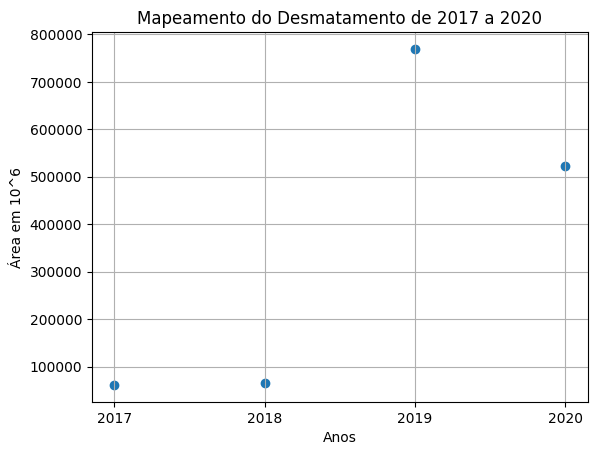

In [ ]:
contador = 0                                                                    # variável contadora de frames
storage = []                                                                    # variável tipo lista para armazenar todas as áreas de desmatamento

option = int(input("Entre com uma das opções a seguir:\n  1 - Código normal(otimizado)\n  2 - Minha versão(consideravelmente mais devagar)\n Sua opção: "))

if(option == 1):
  while(mainVideo.isOpened() and contador<=1050):
    ret, frame = mainVideo.read()

    if not ret:                                                                   # sinaliza o fim do vídeo
      break

    if ((contador % 10) == 0):
      img = frame[130 : frame.shape[0]-100, 0 : frame.shape[1]]                   # trecho do vídeo que despreza o letreiro e timeline da bbc

      grayImage = gray(img.copy())
      limiarizada = lim(grayImage)
      img_contornos, contornos = contours(limiarizada, img)
      armazenamento = getAreas(contornos, contador)

    else:
      pass

    contador = contador + 1                                                       # incremento do contador de frames

  sumAreas(armazenamento)

elif(option == 2):

  while(mainVideo.isOpened() and contador<=1050):
    ret, frame = mainVideo.read()

    if not ret:                                                                   # sinaliza o fim do vídeo
      break

    if ((contador % 10) == 0):
      img = frame[130 : frame.shape[0]-100, 0 : frame.shape[1]]                   # trecho do vídeo que despreza o letreiro e timeline da bbc

      img = enhance(img)
      grayImage = gray(img.copy())
      limiarizada = lim(grayImage)
      img_contornos, contornos = contours(limiarizada, img)
      armazenamento = getAreas(contornos, contador)

    else:
      pass

    contador = contador + 1                                                       # incremento do contador de frames

  sumAreas(armazenamento)
else:
  print("Número Inválido. Reinicie o código e entre com uma opção possível")
